<a href="https://colab.research.google.com/github/binnwy/NASA/blob/main/Model%20Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Exoplanet/balanced_RF.csv')

In [ ]:
# ======================================================
# train_RF_model.ipynb
# ======================================================
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
import joblib

# File paths
csv_path = "/content/drive/MyDrive/Exoplanet/balanced_RF.csv"
model_save_path = "/content/drive/MyDrive/Exoplanet/rf_model.joblib"

# ---------------------------
# 1. Load dataset
# ---------------------------
df = pd.read_csv(csv_path)
features = df.columns.tolist()
features.remove('target')

X = df[features]
y = df['target']

print("Dataset shape:", X.shape)
print("Class distribution:", Counter(y))

# ---------------------------
# 2. Train/Test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ---------------------------
# 3. Train Random Forest
# ---------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ---------------------------
# 4. Evaluation
# ---------------------------
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

print("=== Random Forest Evaluation ===")
print("ROC-AUC:", roc_auc)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------
# 5. Save model
# ---------------------------
joblib.dump(rf, model_save_path)
print(f"✅ Random Forest model saved to {model_save_path}")


Dataset shape: (4394, 20)
Class distribution: Counter({0: 2197, 1: 2197})
Train shape: (3515, 20) Test shape: (879, 20)
=== Random Forest Evaluation ===
ROC-AUC: 0.9995133568026506
F1 Score: 0.9850402761795167
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       440
           1       1.00      0.97      0.99       439

    accuracy                           0.99       879
   macro avg       0.99      0.99      0.99       879
weighted avg       0.99      0.99      0.99       879

Confusion Matrix:
 [[438   2]
 [ 11 428]]
✅ Random Forest model saved to /content/drive/MyDrive/Exoplanet/rf_model.joblib


Dataset shape: (7742, 20)
Class distribution: Counter({1: 3871, 0: 3871})
Train shape: (6193, 20) Test shape: (1549, 20)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:03:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost Evaluation ===
ROC-AUC: 0.9993023255813954
F1 Score: 0.9967679379444085
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       775
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1549
   macro avg       1.00      1.00      1.00      1549
weighted avg       1.00      1.00      1.00      1549

Confusion Matrix:
 [[773   2]
 [  3 771]]


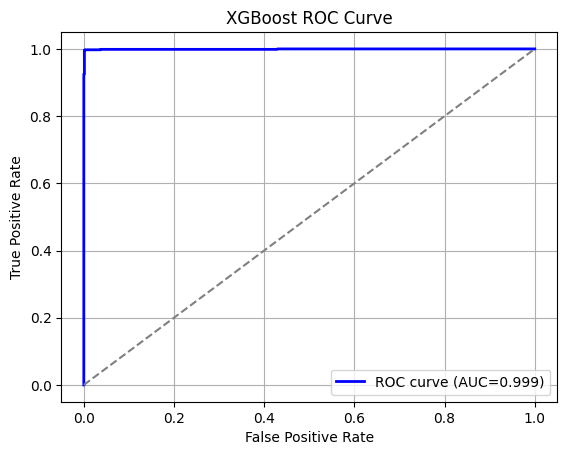

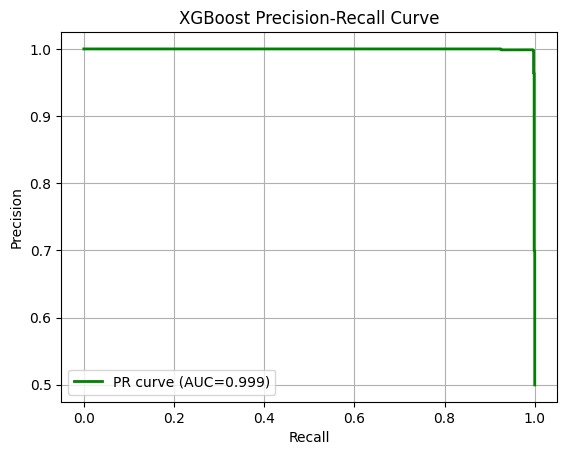


✅ XGBoost model saved to /content/drive/MyDrive/Exoplanet/xgb_model.json


In [ ]:
# ======================================================
# train_XGB_model_balanced.ipynb
# ======================================================
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ---------------------------
# 1. File paths
# ---------------------------
csv_path = "/content/drive/MyDrive/Exoplanet/balanced_XGB.csv"
model_save_path = "/content/drive/MyDrive/Exoplanet/xgb_model.json"

# ---------------------------
# 2. Load dataset
# ---------------------------
df = pd.read_csv(csv_path)
features = df.columns.tolist()
features.remove('target')

X = df[features]
y = df['target']

print("Dataset shape:", X.shape)
print("Class distribution:", Counter(y))

# ---------------------------
# 3. Train/Test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ---------------------------
# 4. Train XGBoost Classifier
# ---------------------------
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=None,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    random_state=42,
    verbosity=1,
    n_jobs=-1
)

xgb.fit(X_train, y_train)  # simple fit for balanced dataset

# ---------------------------
# 5. Evaluation
# ---------------------------
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

print("\n=== XGBoost Evaluation ===")
print("ROC-AUC:", roc_auc)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------
# 6. Plot ROC and PR curves
# ---------------------------
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC={roc_auc_val:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(rec, prec)
plt.figure()
plt.plot(rec, prec, color='green', lw=2, label=f'PR curve (AUC={pr_auc:.3f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("XGBoost Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# ---------------------------
# 7. Save model
# ---------------------------
xgb.get_booster().save_model(model_save_path)
print(f"\n✅ XGBoost model saved to {model_save_path}")


Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6721 - loss: 0.6809 - val_accuracy: 0.9787 - val_loss: 0.1608
Epoch 2/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9781 - loss: 0.0899 - val_accuracy: 0.9852 - val_loss: 0.0485
Epoch 3/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.0674 - val_accuracy: 0.9890 - val_loss: 0.0338
Epoch 4/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0432 - val_accuracy: 0.9877 - val_loss: 0.0307
Epoch 5/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9872 - loss: 0.0383 - val_accuracy: 0.9903 - val_loss: 0.0282
Epoch 6/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0445 - val_accuracy: 0.9929 - val_loss: 0.0263
Epoch 7/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9892 - loss: 0.0375 - val_accuracy: 0.9929 - val_loss: 0.0251
Epoch 8/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9883 - loss: 0.0325 - val_accuracy: 0.9935 - val_loss: 0.0

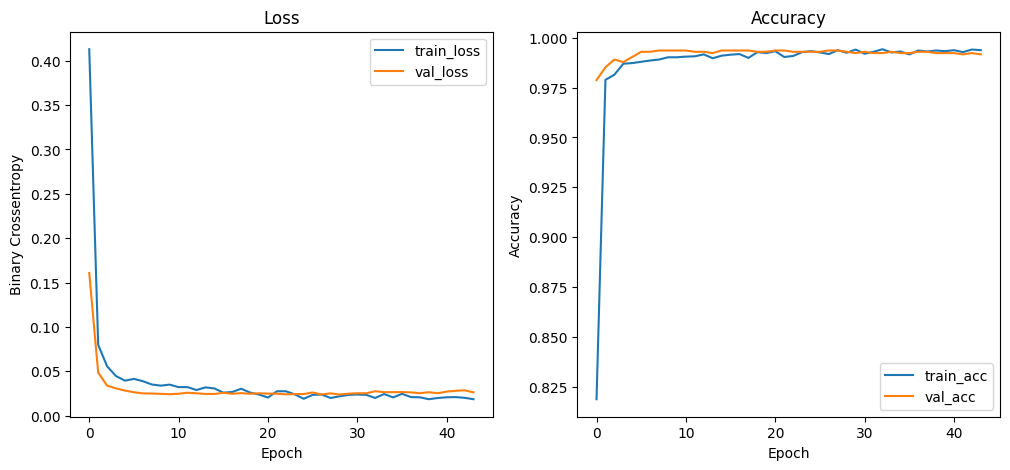

✅ Model and scaler saved.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import joblib

# ---------------------------
# 1. Load balanced dataset
# ---------------------------
csv_path = "/content/drive/MyDrive/Exoplanet/balanced_NN.csv"  # change path if needed
df = pd.read_csv(csv_path)

X = df.drop(columns=['target']).values
y = df['target'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 2. Build Neural Network
# ---------------------------
input_dim = X_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

# ---------------------------
# 3. Train
# ---------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=64,
    callbacks=[es],
    verbose=1
)

# ---------------------------
# 4. Evaluate
# ---------------------------
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC: {roc_auc:.4f}")

# ---------------------------
# 5. Plot training curves
# ---------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# ---------------------------
# 6. Save model and scaler
# ---------------------------
model.save("nn_balanced.keras")
joblib.dump(scaler, "scaler_nn_balanced.save")
print("✅ Model and scaler saved.")


In [ ]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# ---------------------------
# 1. Load model and scaler
# ---------------------------
model = load_model("/content/drive/MyDrive/Exoplanet/nn_balanced.keras")
scaler = joblib.load("/content/drive/MyDrive/Exoplanet/scaler_nn_balanced.save")

# ---------------------------
# 2. Example input for testing
# ---------------------------
# Make sure this has 20 values matching your dataset columns
user_values = np.array([
    0.98, 0, 0, 5700, 100, 90, 4.4, 0.05, 0.1, 365,
    10, 0.05, 0.1, 0.02, 1.0, 0.5, 0, 0, 0, 0
])

if user_values.size != scaler.mean_.shape[0]:
    print(f"⚠️ Expected {scaler.mean_.shape[0]} features, got {user_values.size}")
else:
    # ---------------------------
    # 3. Scale input and predict
    # ---------------------------
    user_scaled = scaler.transform(user_values.reshape(1, -1))
    pred_prob = model.predict(user_scaled)[0][0]
    pred_class = int(pred_prob > 0.5)

    # ---------------------------
    # 4. Show result
    # ---------------------------
    if pred_class == 1:
        print(f"🌟 Likely a Planet! (Probability: {pred_prob:.3f})")
    else:
        print(f"❌ Not a Planet! (Probability: {pred_prob:.3f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
❌ Not a Planet! (Probability: 0.000)
